Given the dataset attached in the folder:

a)       For each team, what difference in ‘rest’ can you see, when playing ‘home’ games, v/s when playing ‘away’ games?

 

b)      What is the effect that ‘rest’ has, on overall match-outcome?

 

c)       When are teams more victorious- when playing at home, or when playing away?



In [31]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Loading the dataframes
df_october = pd.read_csv('./data/October.csv')
df_november = pd.read_csv('./data/November.csv')
df_december = pd.read_csv('./data/December.csv')

----------------------------------------

- Displaying the 3 datasets to check they were properly load

In [3]:
df_december

,Date,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Unnamed: 6,Unnamed: 7,Attend.,Arena,Notes
0,Tue Dec 1 2015,7:00p,Washington Wizards,97,Cleveland Cavaliers,85,Box Score,NaN,20562,Quicken Loans Arena,NaN
1,Tue Dec 1 2015,7:00p,Los Angeles Lakers,91,Philadelphia 76ers,103,Box Score,NaN,20510,Wells Fargo Center,NaN
2,Tue Dec 1 2015,7:30p,Phoenix Suns,91,Brooklyn Nets,94,Box Score,NaN,12787,Barclays Center,NaN
3,Tue Dec 1 2015,8:00p,Orlando Magic,96,Minnesota Timberwolves,93,Box Score,NaN,10694,Target Center,NaN
4,Tue Dec 1 2015,8:00p,Memphis Grizzlies,113,New Orleans Pelicans,104,Box Score,NaN,16020,Smoothie King Center,NaN
...,...,...,...,...,...,...,...,...,...,...,...
223,Thu Dec 31 2015,6:00p,Milwaukee Bucks,120,Indiana Pacers,116,Box Score,NaN,16348,Bankers Life Fieldhouse,NaN
224,Thu Dec 31 2015,7:00p,Golden State Warriors,114,Houston Rockets,110,Box Score,NaN,18313,Toyota Center,NaN
225,Thu Dec 31 2015,8:00p,Los Angeles Clippers,95,New Orleans Pelicans,89,Box Score,NaN,16920,Smoothie King Center,NaN
226,Thu Dec 31 2015,8:00p,Phoenix Suns,106,Oklahoma City Thunder,110,Box Score,NaN,18203,Chesapeake Energy Arena,NaN


In [4]:
df_november

,Date,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Unnamed: 6,Unnamed: 7,Attend.,Arena,Notes
0,Sun Nov 1 2015,2:00p,Atlanta Hawks,94,Charlotte Hornets,92,Box Score,NaN,18691,Time Warner Cable Arena,NaN
1,Sun Nov 1 2015,3:30p,San Antonio Spurs,95,Boston Celtics,87,Box Score,NaN,17461,TD Garden,NaN
2,Sun Nov 1 2015,6:00p,Houston Rockets,89,Miami Heat,109,Box Score,NaN,19600,AmericanAirlines Arena,NaN
3,Sun Nov 1 2015,6:00p,Milwaukee Bucks,87,Toronto Raptors,106,Box Score,NaN,19800,Air Canada Centre,NaN
4,Sun Nov 1 2015,7:00p,Orlando Magic,87,Chicago Bulls,92,Box Score,NaN,21585,United Center,NaN
...,...,...,...,...,...,...,...,...,...,...,...
218,Mon Nov 30 2015,8:00p,San Antonio Spurs,89,Chicago Bulls,92,Box Score,NaN,21909,United Center,NaN
219,Mon Nov 30 2015,8:00p,Denver Nuggets,74,Milwaukee Bucks,92,Box Score,NaN,10187,BMO Harris Bradley Center,NaN
220,Mon Nov 30 2015,9:00p,Golden State Warriors,106,Utah Jazz,103,Box Score,NaN,19911,Vivint Smart Home Arena,NaN
221,Mon Nov 30 2015,10:00p,Dallas Mavericks,98,Sacramento Kings,112,Box Score,NaN,16937,Sleep Train Arena,NaN


In [5]:
df_october

,Date,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Unnamed: 6,Unnamed: 7,Attend.,Arena,Notes
0,Tue Oct 27 2015,8:00p,Cleveland Cavaliers,95,Chicago Bulls,97,Box Score,NaN,21957,United Center,NaN
1,Tue Oct 27 2015,8:00p,Detroit Pistons,106,Atlanta Hawks,94,Box Score,NaN,19187,Philips Arena,NaN
2,Tue Oct 27 2015,10:30p,New Orleans Pelicans,95,Golden State Warriors,111,Box Score,NaN,19596,Oracle Arena,NaN
3,Wed Oct 28 2015,7:00p,Washington Wizards,88,Orlando Magic,87,Box Score,NaN,18846,Amway Center,NaN
4,Wed Oct 28 2015,7:30p,Philadelphia 76ers,95,Boston Celtics,112,Box Score,NaN,18624,TD Garden,NaN
5,Wed Oct 28 2015,7:30p,Chicago Bulls,115,Brooklyn Nets,100,Box Score,NaN,17732,Barclays Center,NaN
6,Wed Oct 28 2015,7:30p,Utah Jazz,87,Detroit Pistons,92,Box Score,NaN,18434,The Palace of Auburn Hills,NaN
7,Wed Oct 28 2015,7:30p,Indiana Pacers,99,Toronto Raptors,106,Box Score,NaN,19800,Air Canada Centre,NaN
8,Wed Oct 28 2015,7:30p,Charlotte Hornets,94,Miami Heat,104,Box Score,NaN,19724,AmericanAirlines Arena,NaN
9,Wed Oct 28 2015,8:00p,New York Knicks,122,Milwaukee Bucks,97,Box Score,NaN,18717,BMO Harris Bradley Center,NaN


In [6]:
print(df_october.columns)
print(df_november.columns)
print(df_december.columns)

Index(['Date', 'Start (ET)', 'Visitor/Neutral', 'PTS', 'Home/Neutral', 'PTS.1',
       'Unnamed: 6', 'Unnamed: 7', 'Attend.', 'Arena', 'Notes'],
      dtype='object')
Index(['Date', 'Start (ET)', 'Visitor/Neutral', 'PTS', 'Home/Neutral', 'PTS.1',
       'Unnamed: 6', 'Unnamed: 7', 'Attend.', 'Arena', 'Notes'],
      dtype='object')
Index(['Date', 'Start (ET)', 'Visitor/Neutral', 'PTS', 'Home/Neutral', 'PTS.1',
       'Unnamed: 6', 'Unnamed: 7', 'Attend.', 'Arena', 'Notes'],
      dtype='object')


------------------------------------------

- Concatenating the three dataset since they all have the same features and will be better for the analysis 

In [7]:
frames = [df_october,df_november, df_december ]
df = pd.concat(frames)

In [8]:
df.reset_index(drop=True,inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             489 non-null    object
 1   Start (ET)       489 non-null    object
 2   Visitor/Neutral  489 non-null    object
 3   PTS              489 non-null    int64 
 4   Home/Neutral     489 non-null    object
 5   PTS.1            489 non-null    int64 
 6   Unnamed: 6       489 non-null    object
 7   Unnamed: 7       25 non-null     object
 8   Attend.          489 non-null    int64 
 9   Arena            489 non-null    object
 10  Notes            1 non-null      object
dtypes: int64(3), object(8)
memory usage: 42.1+ KB


In [10]:
#Checking for all the null values in the new dataset
df.isnull().sum()

Date                 0
Start (ET)           0
Visitor/Neutral      0
PTS                  0
Home/Neutral         0
PTS.1                0
Unnamed: 6           0
Unnamed: 7         464
Attend.              0
Arena                0
Notes              488
dtype: int64

In [11]:
df['Unnamed: 7'].unique()

array([nan, '2OT', 'OT', '4OT'], dtype=object)

- Unnamed: 7 respresents if the match had any Over Time (OT)

In [12]:
df['Notes'].unique()

array([nan, 'at Mexico City Mexico'], dtype=object)

- If the match was played in any location different from nba registered stadium 'Note' indicates in which city it was played

-------------------------------

In [13]:
# array of the name of every team in the nba
Teams = df['Visitor/Neutral'].unique()
len(Teams) # number of teams in the nba

30

In [14]:
print(Teams)

['Cleveland Cavaliers' 'Detroit Pistons' 'New Orleans Pelicans'
 'Washington Wizards' 'Philadelphia 76ers' 'Chicago Bulls' 'Utah Jazz'
 'Indiana Pacers' 'Charlotte Hornets' 'New York Knicks'
 'San Antonio Spurs' 'Denver Nuggets' 'Dallas Mavericks'
 'Los Angeles Clippers' 'Minnesota Timberwolves' 'Memphis Grizzlies'
 'Atlanta Hawks' 'Miami Heat' 'Oklahoma City Thunder' 'Toronto Raptors'
 'Brooklyn Nets' 'Golden State Warriors' 'Los Angeles Lakers'
 'Portland Trail Blazers' 'Phoenix Suns' 'Sacramento Kings'
 'Houston Rockets' 'Milwaukee Bucks' 'Orlando Magic' 'Boston Celtics']


In [15]:
# array of the name of every team in the nba
Teams = df['Home/Neutral'].unique()
len(Teams) # number of teams in the nba

30

In [16]:
print(Teams)

['Chicago Bulls' 'Atlanta Hawks' 'Golden State Warriors' 'Orlando Magic'
 'Boston Celtics' 'Brooklyn Nets' 'Detroit Pistons' 'Toronto Raptors'
 'Miami Heat' 'Milwaukee Bucks' 'Oklahoma City Thunder'
 'Memphis Grizzlies' 'Houston Rockets' 'Phoenix Suns'
 'Portland Trail Blazers' 'Sacramento Kings' 'Los Angeles Lakers'
 'Indiana Pacers' 'New York Knicks' 'Los Angeles Clippers'
 'Cleveland Cavaliers' 'Philadelphia 76ers' 'San Antonio Spurs'
 'Denver Nuggets' 'Washington Wizards' 'New Orleans Pelicans'
 'Charlotte Hornets' 'Minnesota Timberwolves' 'Dallas Mavericks'
 'Utah Jazz']


### Rest Days

In [17]:
# Parse the string into a datetime object
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Unnamed: 6,Unnamed: 7,Attend.,Arena,Notes
0,2015-10-27,8:00p,Cleveland Cavaliers,95,Chicago Bulls,97,Box Score,NaN,21957,United Center,NaN
1,2015-10-27,8:00p,Detroit Pistons,106,Atlanta Hawks,94,Box Score,NaN,19187,Philips Arena,NaN
2,2015-10-27,10:30p,New Orleans Pelicans,95,Golden State Warriors,111,Box Score,NaN,19596,Oracle Arena,NaN
3,2015-10-28,7:00p,Washington Wizards,88,Orlando Magic,87,Box Score,NaN,18846,Amway Center,NaN
4,2015-10-28,7:30p,Philadelphia 76ers,95,Boston Celtics,112,Box Score,NaN,18624,TD Garden,NaN
...,...,...,...,...,...,...,...,...,...,...,...
484,2015-12-31,6:00p,Milwaukee Bucks,120,Indiana Pacers,116,Box Score,NaN,16348,Bankers Life Fieldhouse,NaN
485,2015-12-31,7:00p,Golden State Warriors,114,Houston Rockets,110,Box Score,NaN,18313,Toyota Center,NaN
486,2015-12-31,8:00p,Los Angeles Clippers,95,New Orleans Pelicans,89,Box Score,NaN,16920,Smoothie King Center,NaN
487,2015-12-31,8:00p,Phoenix Suns,106,Oklahoma City Thunder,110,Box Score,NaN,18203,Chesapeake Energy Arena,NaN


In [18]:
#Verification of segmenting the dataset to extract the information we need for each team
df[(df['Visitor/Neutral'] == '') | (df["Home/Neutral"] == 'Cleveland Cavaliers')]

,Date,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Unnamed: 6,Unnamed: 7,Attend.,Arena,Notes
20,2015-10-30,7:00p,Miami Heat,92,Cleveland Cavaliers,102,Box Score,NaN,20562,Quicken Loans Arena,NaN
62,2015-11-04,8:00p,New York Knicks,86,Cleveland Cavaliers,96,Box Score,NaN,20562,Quicken Loans Arena,NaN
77,2015-11-06,7:30p,Philadelphia 76ers,102,Cleveland Cavaliers,108,Box Score,NaN,20562,Quicken Loans Arena,NaN
93,2015-11-08,3:30p,Indiana Pacers,97,Cleveland Cavaliers,101,Box Score,NaN,20562,Quicken Loans Arena,NaN
105,2015-11-10,7:00p,Utah Jazz,114,Cleveland Cavaliers,118,Box Score,NaN,20562,Quicken Loans Arena,NaN
175,2015-11-19,8:00p,Milwaukee Bucks,100,Cleveland Cavaliers,115,Box Score,NaN,20562,Quicken Loans Arena,NaN
190,2015-11-21,7:30p,Atlanta Hawks,97,Cleveland Cavaliers,109,Box Score,NaN,20562,Quicken Loans Arena,NaN
202,2015-11-23,7:00p,Orlando Magic,103,Cleveland Cavaliers,117,Box Score,NaN,20562,Quicken Loans Arena,NaN
239,2015-11-28,7:30p,Brooklyn Nets,88,Cleveland Cavaliers,90,Box Score,NaN,20562,Quicken Loans Arena,NaN
261,2015-12-01,7:00p,Washington Wizards,97,Cleveland Cavaliers,85,Box Score,NaN,20562,Quicken Loans Arena,NaN


In [19]:
# Combine information from the 'Visitor/Neutral' and 'Home/Neutral' columns to determine the teams playing in each match
df['Team'] = df['Visitor/Neutral'].where(df['PTS'] > df['PTS.1'], df['Home/Neutral'])

# Calculate the difference in consecutive dates for each team to determine the rest days between matches
df['Rest Days'] = df.groupby('Team')['Date'].diff().dt.days - 1

# Group the data by each team and sum the rest days
rest_days_per_team = df.groupby('Team')['Rest Days'].sum()

print(rest_days_per_team)

Team
Atlanta Hawks             41.0
Boston Celtics            43.0
Brooklyn Nets             39.0
Charlotte Hornets         39.0
Chicago Bulls             47.0
Cleveland Cavaliers       42.0
Dallas Mavericks          45.0
Denver Nuggets            45.0
Detroit Pistons           48.0
Golden State Warriors     36.0
Houston Rockets           38.0
Indiana Pacers            38.0
Los Angeles Clippers      44.0
Los Angeles Lakers        49.0
Memphis Grizzlies         44.0
Miami Heat                42.0
Milwaukee Bucks           47.0
Minnesota Timberwolves    52.0
New Orleans Pelicans      37.0
New York Knicks           48.0
Oklahoma City Thunder     42.0
Orlando Magic             39.0
Philadelphia 76ers        27.0
Phoenix Suns              38.0
Portland Trail Blazers    50.0
Sacramento Kings          43.0
San Antonio Spurs         34.0
Toronto Raptors           44.0
Utah Jazz                 49.0
Washington Wizards        46.0
Name: Rest Days, dtype: float64


Creating a 'win' column

In [20]:
win = []
for i in range(len(df)):
    if df.iloc[i]['PTS.1']>df.iloc[i]['PTS']:
        win.append(df.iloc[i]['Home/Neutral'])
    elif df.iloc[i]['PTS.1']<df.iloc[i]['PTS']:
        win.append(df.iloc[i]['Visitor/Neutral'])
    else:
        win.append('Tied')
df['Win'] =win

In [21]:
df

,Date,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Unnamed: 6,Unnamed: 7,Attend.,Arena,Notes,Team,Rest Days,Win
0,2015-10-27,8:00p,Cleveland Cavaliers,95,Chicago Bulls,97,Box Score,NaN,21957,United Center,NaN,Chicago Bulls,NaN,Chicago Bulls
1,2015-10-27,8:00p,Detroit Pistons,106,Atlanta Hawks,94,Box Score,NaN,19187,Philips Arena,NaN,Detroit Pistons,NaN,Detroit Pistons
2,2015-10-27,10:30p,New Orleans Pelicans,95,Golden State Warriors,111,Box Score,NaN,19596,Oracle Arena,NaN,Golden State Warriors,NaN,Golden State Warriors
3,2015-10-28,7:00p,Washington Wizards,88,Orlando Magic,87,Box Score,NaN,18846,Amway Center,NaN,Washington Wizards,NaN,Washington Wizards
4,2015-10-28,7:30p,Philadelphia 76ers,95,Boston Celtics,112,Box Score,NaN,18624,TD Garden,NaN,Boston Celtics,NaN,Boston Celtics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,2015-12-31,6:00p,Milwaukee Bucks,120,Indiana Pacers,116,Box Score,NaN,16348,Bankers Life Fieldhouse,NaN,Milwaukee Bucks,7.0,Milwaukee Bucks
485,2015-12-31,7:00p,Golden State Warriors,114,Houston Rockets,110,Box Score,NaN,18313,Toyota Center,NaN,Golden State Warriors,2.0,Golden State Warriors
486,2015-12-31,8:00p,Los Angeles Clippers,95,New Orleans Pelicans,89,Box Score,NaN,16920,Smoothie King Center,NaN,Los Angeles Clippers,0.0,Los Angeles Clippers
487,2015-12-31,8:00p,Phoenix Suns,106,Oklahoma City Thunder,110,Box Score,NaN,18203,Chesapeake Energy Arena,NaN,Oklahoma City Thunder,1.0,Oklahoma City Thunder


Creating a separate dataframe with required information to make it easier for our analysis

In [22]:
team_df =pd.DataFrame(columns = ['Date','Team','Opponent','Home/Away','Rest_Days','Win/Loss_Range','Win/Loss'])
for team in Teams:
    a=df[(df['Visitor/Neutral'] == team) |(df['Home/Neutral'] == team) ]
    a.reset_index(inplace=True)
    for i in range(len(a)):
        r=[]
        r.append(a.iloc[i]['Date'])
        r.append(team)
        if(a.iloc[i]['Visitor/Neutral']==team):
            r.append(a.iloc[i]['Home/Neutral'])
            r.append('Away')
        else:
            r.append(a.iloc[i]['Visitor/Neutral'])
            r.append('Home')
        if(i==0):
            r.append(1)
        else:
            r.append((a.iloc[i]['Date']-a.iloc[i-1]['Date']).days)
        r.append(abs(a.iloc[i]['PTS']-a.iloc[i]['PTS.1']))
        if(a.iloc[i]['Win']==team):
            r.append(1)
        else:
            r.append(0)
        team_df.loc[len(team_df.index)]=r

In [23]:
team_df

,Date,Team,Opponent,Home/Away,Rest_Days,Win/Loss_Range,Win/Loss
0,2015-10-27,Chicago Bulls,Cleveland Cavaliers,Home,1,2,1
1,2015-10-28,Chicago Bulls,Brooklyn Nets,Away,1,15,1
2,2015-10-30,Chicago Bulls,Detroit Pistons,Away,2,4,0
3,2015-11-01,Chicago Bulls,Orlando Magic,Home,2,5,1
4,2015-11-03,Chicago Bulls,Charlotte Hornets,Away,2,25,0
...,...,...,...,...,...,...,...
973,2015-12-23,Utah Jazz,Golden State Warriors,Away,2,18,0
974,2015-12-26,Utah Jazz,Los Angeles Clippers,Home,3,5,0
975,2015-12-28,Utah Jazz,Philadelphia 76ers,Home,2,4,1
976,2015-12-30,Utah Jazz,Minnesota Timberwolves,Away,2,14,0


For each team, what difference in ‘rest’ can you see, when playing ‘home’ games, v/s when playing ‘away’ games?

In [24]:
home_avg=[]
away_avg=[]
for team in Teams:
    home_rest=0
    home_match_count=0
    away_rest=0
    away_match_count=0
    a=team_df[team_df['Team'] == team]
    a.reset_index(inplace=True)
    for i in range(len(a)):
        if(a.iloc[i]['Home/Away'] == 'Home'):
            home_rest = home_rest + (a.iloc[i]['Rest_Days'])
            home_match_count = home_match_count + 1
        else:
            away_rest = away_rest + (a.iloc[i]['Rest_Days'])
            away_match_count = away_match_count + 1
    home_avg.append(home_rest/home_match_count)
    away_avg.append(away_rest/away_match_count)
        
    

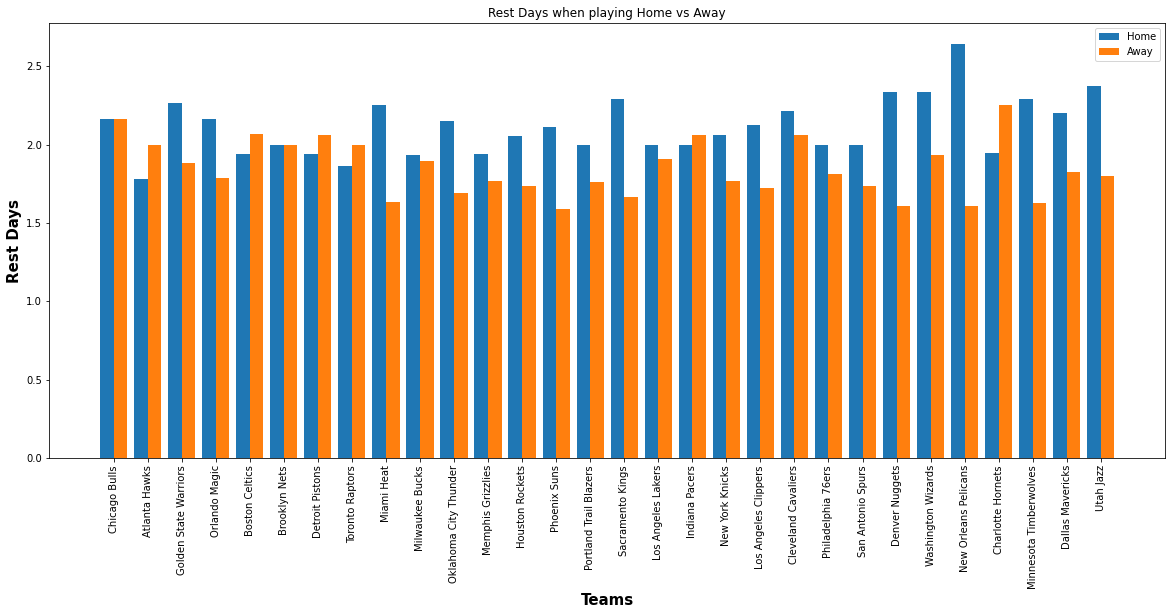

In [25]:
fig = plt.subplots(figsize =(20, 8)) 
barWidth = 0.4
br1 = np.arange(len(home_avg))+(barWidth/2)
br2 = [x + barWidth for x in br1] 
plt.bar(br1,home_avg,width = barWidth, label='Home')
plt.bar(br2,away_avg,width = barWidth, label='Away')

# Adding Xticks 
plt.xlabel('Teams', fontweight ='bold', fontsize = 15) 
plt.ylabel('Rest Days', fontweight ='bold', fontsize = 15) 
plt.xticks([r + barWidth for r in range(len(home_avg))], 
        Teams)
plt.xticks(rotation=90)
plt.title('Rest Days when playing Home vs Away')
plt.legend() 
plt.show() 

What is the effect that ‘rest’ has, on overall match-outcome?

In [26]:
team_df

,Date,Team,Opponent,Home/Away,Rest_Days,Win/Loss_Range,Win/Loss
0,2015-10-27,Chicago Bulls,Cleveland Cavaliers,Home,1,2,1
1,2015-10-28,Chicago Bulls,Brooklyn Nets,Away,1,15,1
2,2015-10-30,Chicago Bulls,Detroit Pistons,Away,2,4,0
3,2015-11-01,Chicago Bulls,Orlando Magic,Home,2,5,1
4,2015-11-03,Chicago Bulls,Charlotte Hornets,Away,2,25,0
...,...,...,...,...,...,...,...
973,2015-12-23,Utah Jazz,Golden State Warriors,Away,2,18,0
974,2015-12-26,Utah Jazz,Los Angeles Clippers,Home,3,5,0
975,2015-12-28,Utah Jazz,Philadelphia 76ers,Home,2,4,1
976,2015-12-30,Utah Jazz,Minnesota Timberwolves,Away,2,14,0


Effect of rest on each team's outcome

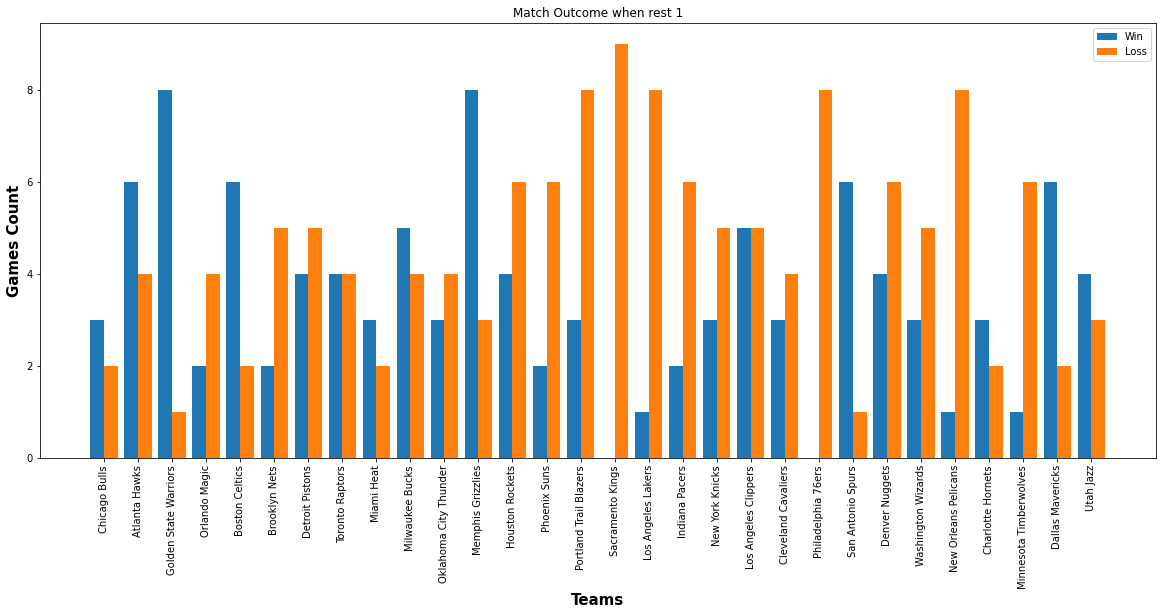

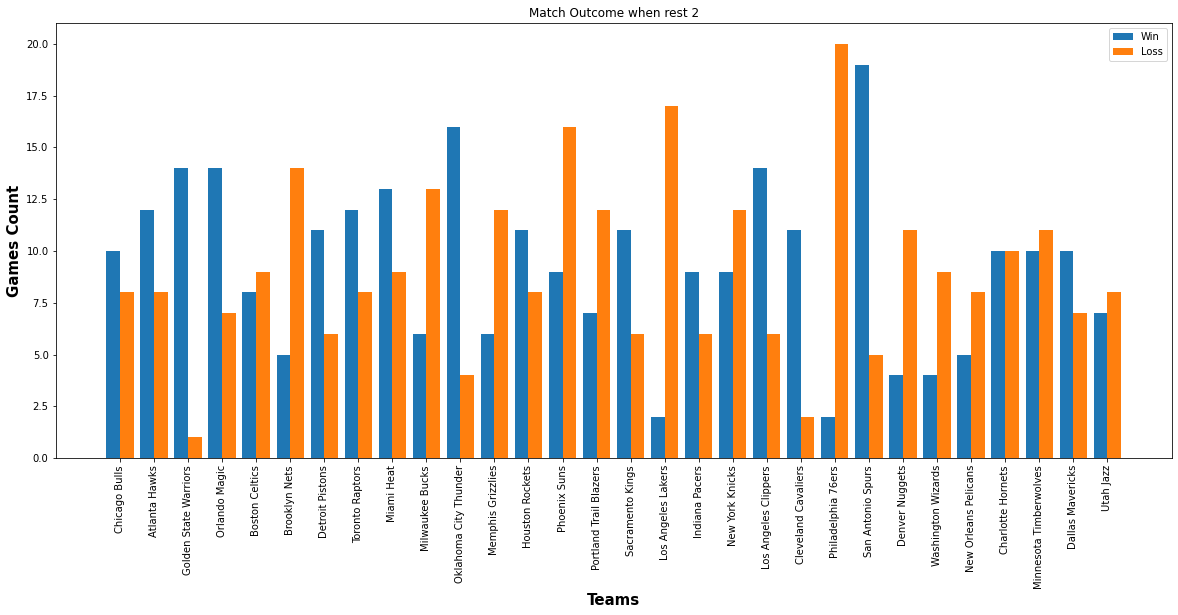

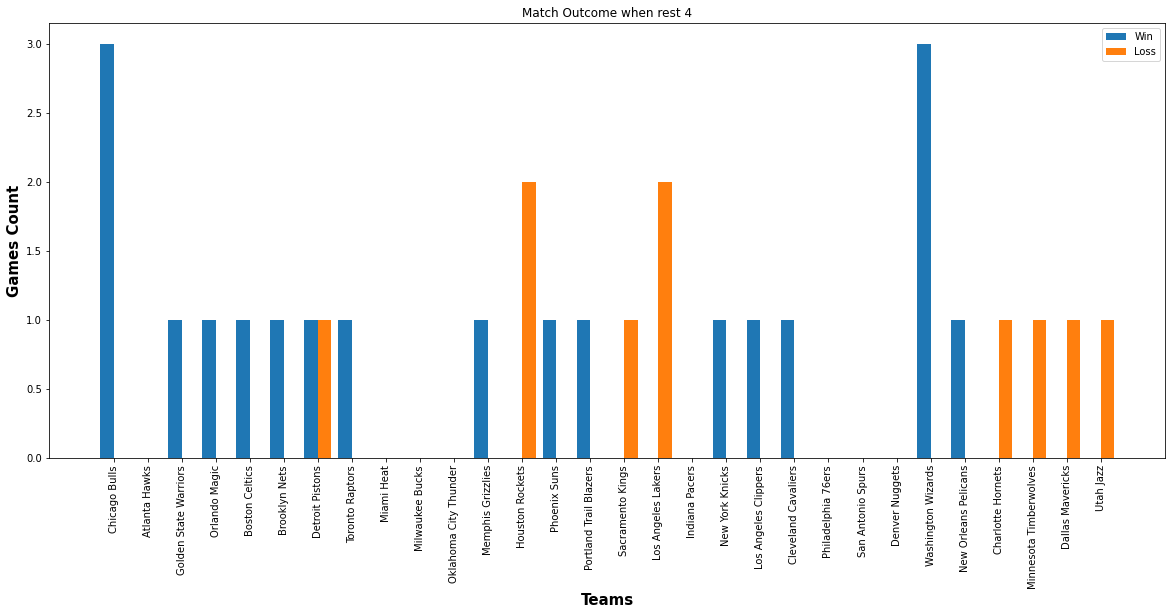

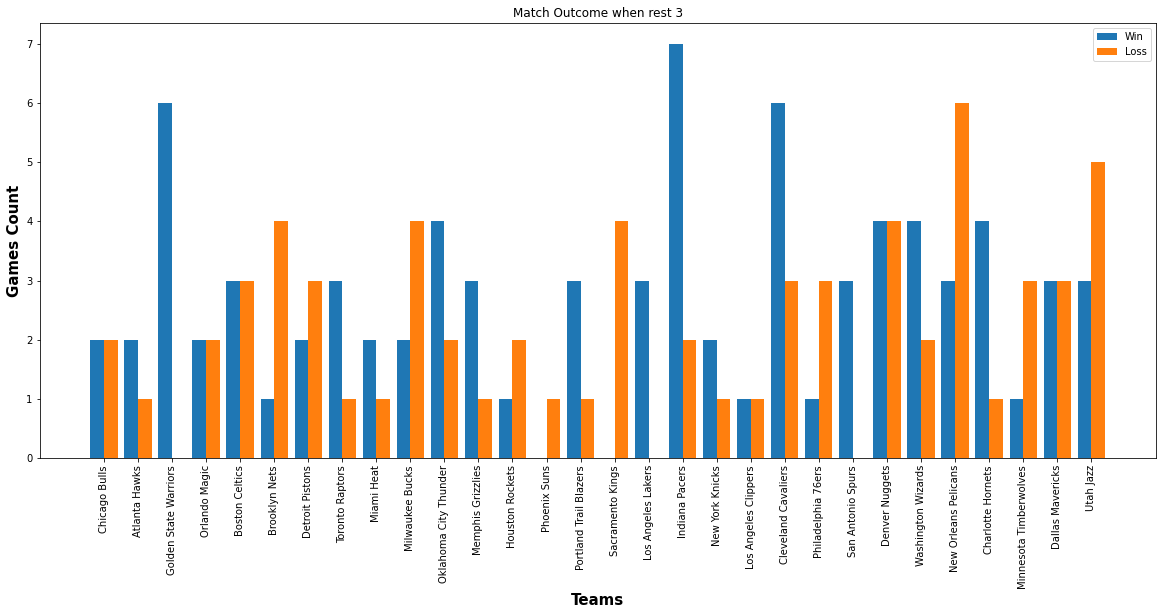

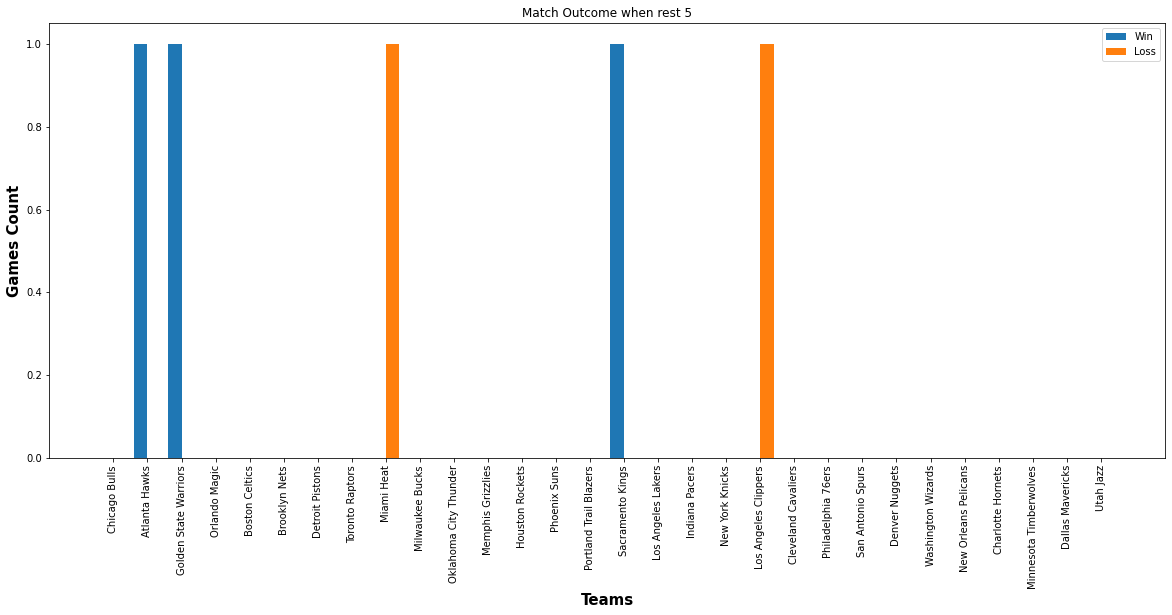

In [27]:
for i in (team_df['Rest_Days'].unique()):
    win_dict={}
    loss_dict={}
    for team in Teams:
        win_dict[team]=len(team_df[(team_df['Team']==team) & (team_df['Rest_Days']==i) & (team_df['Win/Loss']==1)])
        loss_dict[team]=len(team_df[(team_df['Team']==team) & (team_df['Rest_Days']==i) & (team_df['Win/Loss']==0)])
    fig = plt.subplots(figsize =(20, 8)) 
    barWidth = 0.4
    br1 = np.arange(len(win_dict.keys()))+(barWidth/2)
    br2 = [x + barWidth for x in br1] 
    plt.bar(br1,win_dict.values(),width = barWidth, label='Win')
    plt.bar(br2,loss_dict.values(),width = barWidth, label='Loss')
    
    # Adding Xticks 
    plt.xlabel('Teams', fontweight ='bold', fontsize = 15) 
    plt.ylabel('Games Count', fontweight ='bold', fontsize = 15) 
    plt.xticks([r + barWidth for r in range(30)], 
            Teams)
    plt.xticks(rotation=90)
    plt.title(f'Match Outcome when rest {i}')
    plt.legend() 
    plt.show() 

### Winrate

In [75]:
#Empty dictionaries to save the results for each team
home_wins = {}
away_wins = {}
home_matches = {}
away_matches = {}

for index, row in df.iterrows():
    home_team = row['Home/Neutral']
    away_team = row['Visitor/Neutral']
    home_points = row['PTS.1']
    away_points = row['PTS']
    
    if home_points > away_points:
        winner = home_team
        loser = away_team
    else:
        winner = away_team
        loser = home_team

    if home_team not in home_wins:
        home_wins[home_team] = 0
        home_matches[home_team] = 0
        
    if away_team not in away_wins: 
        away_wins[away_team] = 0
        away_matches[away_team] = 0

    home_matches[home_team] += 1
    away_matches[away_team] += 1

    if winner != 'Tie':
        if winner == home_team:
            home_wins[home_team] += 1
        else:
            away_wins[away_team] += 1
        

In [76]:
home_wins

{'Chicago Bulls': 13,
 'Atlanta Hawks': 12,
 'Golden State Warriors': 15,
 'Orlando Magic': 12,
 'Boston Celtics': 9,
 'Brooklyn Nets': 6,
 'Detroit Pistons': 11,
 'Toronto Raptors': 10,
 'Miami Heat': 13,
 'Milwaukee Bucks': 9,
 'Oklahoma City Thunder': 16,
 'Memphis Grizzlies': 11,
 'Houston Rockets': 10,
 'Phoenix Suns': 8,
 'Portland Trail Blazers': 8,
 'Sacramento Kings': 8,
 'Los Angeles Lakers': 2,
 'Indiana Pacers': 11,
 'New York Knicks': 8,
 'Los Angeles Clippers': 10,
 'Cleveland Cavaliers': 13,
 'Philadelphia 76ers': 1,
 'San Antonio Spurs': 19,
 'Denver Nuggets': 5,
 'Washington Wizards': 7,
 'New Orleans Pelicans': 7,
 'Charlotte Hornets': 13,
 'Minnesota Timberwolves': 5,
 'Dallas Mavericks': 10,
 'Utah Jazz': 9}

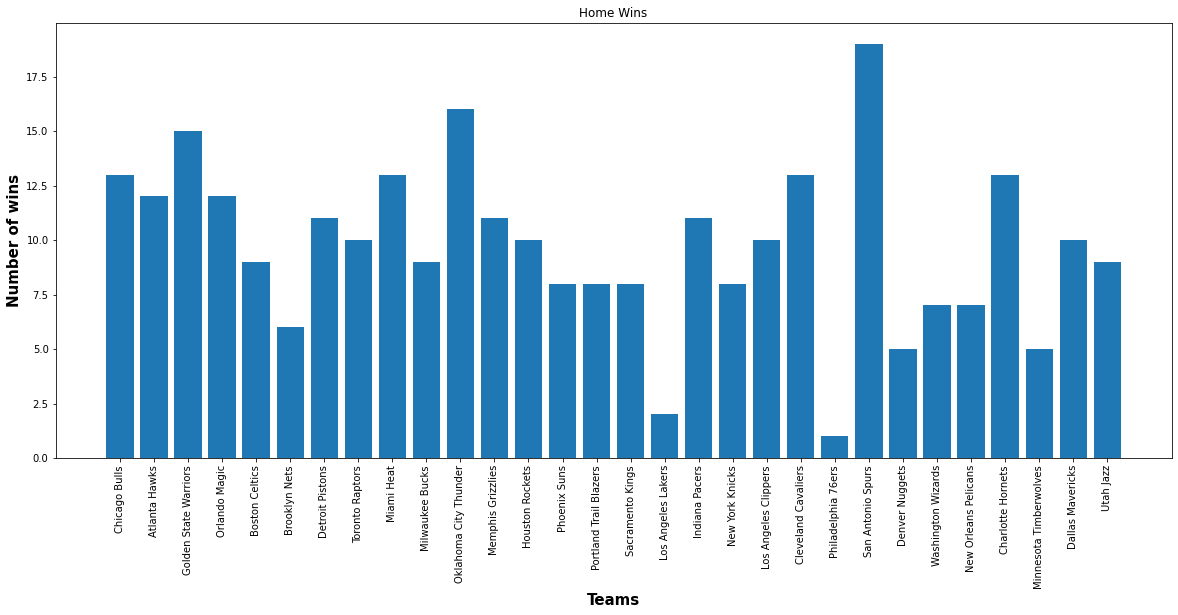

In [77]:
plt.figure(figsize=(20,8))
names = list(home_wins.keys())
values = list(home_wins.values())
plt.bar(range(len(home_wins)), values, tick_label=names)
plt.xticks(rotation=90)
plt.title('Home Wins')
plt.xlabel('Teams', fontweight ='bold', fontsize = 15) 
plt.ylabel('Number of wins', fontweight ='bold', fontsize = 15) 
plt.show()

In [78]:
away_wins 

{'Cleveland Cavaliers': 8,
 'Detroit Pistons': 7,
 'New Orleans Pelicans': 3,
 'Washington Wizards': 7,
 'Philadelphia 76ers': 2,
 'Chicago Bulls': 5,
 'Utah Jazz': 5,
 'Indiana Pacers': 7,
 'Charlotte Hornets': 4,
 'New York Knicks': 7,
 'San Antonio Spurs': 9,
 'Denver Nuggets': 7,
 'Dallas Mavericks': 9,
 'Los Angeles Clippers': 11,
 'Minnesota Timberwolves': 7,
 'Memphis Grizzlies': 7,
 'Atlanta Hawks': 9,
 'Miami Heat': 5,
 'Oklahoma City Thunder': 7,
 'Toronto Raptors': 10,
 'Brooklyn Nets': 3,
 'Golden State Warriors': 15,
 'Los Angeles Lakers': 4,
 'Portland Trail Blazers': 6,
 'Phoenix Suns': 4,
 'Sacramento Kings': 4,
 'Houston Rockets': 6,
 'Milwaukee Bucks': 4,
 'Orlando Magic': 7,
 'Boston Celtics': 9}

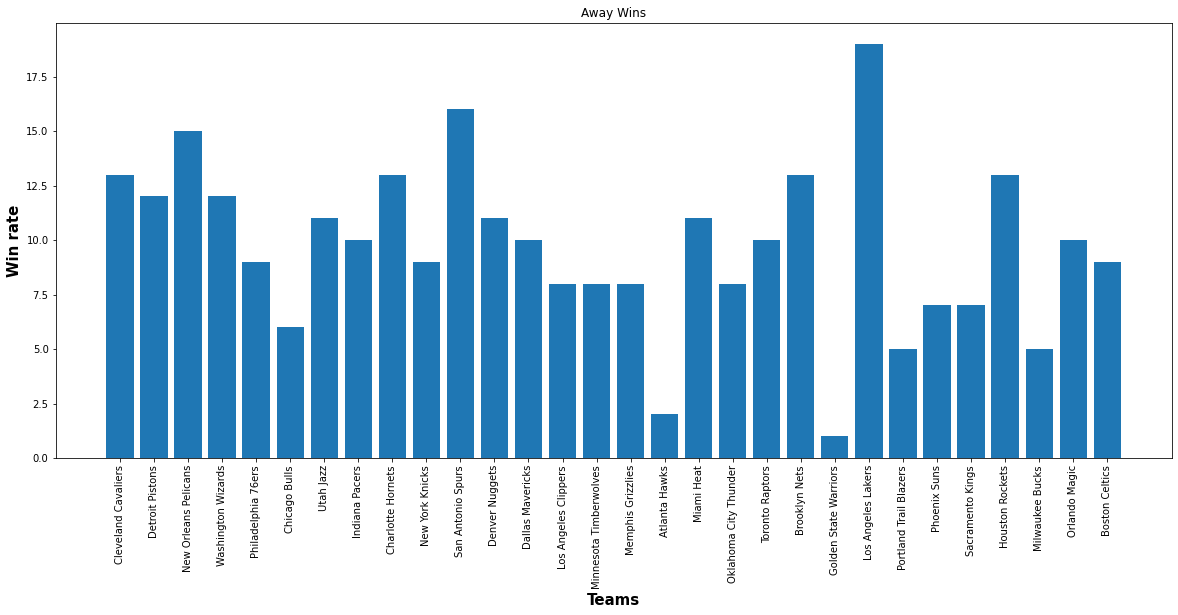

In [79]:
plt.figure(figsize=(20,8))
names_away = list(away_wins.keys())
values_away = list(away_wins.values())
plt.bar(range(len(away_wins)), values, tick_label=names_away)
plt.xticks(rotation=90)
plt.title('Away Wins')
plt.xlabel('Teams', fontweight ='bold', fontsize = 15) 
plt.ylabel('Win rate', fontweight ='bold', fontsize = 15) 
plt.show()

In [80]:
home_matches 

{'Chicago Bulls': 18,
 'Atlanta Hawks': 18,
 'Golden State Warriors': 15,
 'Orlando Magic': 18,
 'Boston Celtics': 17,
 'Brooklyn Nets': 16,
 'Detroit Pistons': 16,
 'Toronto Raptors': 15,
 'Miami Heat': 20,
 'Milwaukee Bucks': 15,
 'Oklahoma City Thunder': 20,
 'Memphis Grizzlies': 17,
 'Houston Rockets': 19,
 'Phoenix Suns': 18,
 'Portland Trail Blazers': 14,
 'Sacramento Kings': 17,
 'Los Angeles Lakers': 11,
 'Indiana Pacers': 16,
 'New York Knicks': 16,
 'Los Angeles Clippers': 16,
 'Cleveland Cavaliers': 14,
 'Philadelphia 76ers': 13,
 'San Antonio Spurs': 19,
 'Denver Nuggets': 15,
 'Washington Wizards': 15,
 'New Orleans Pelicans': 14,
 'Charlotte Hornets': 19,
 'Minnesota Timberwolves': 17,
 'Dallas Mavericks': 15,
 'Utah Jazz': 16}

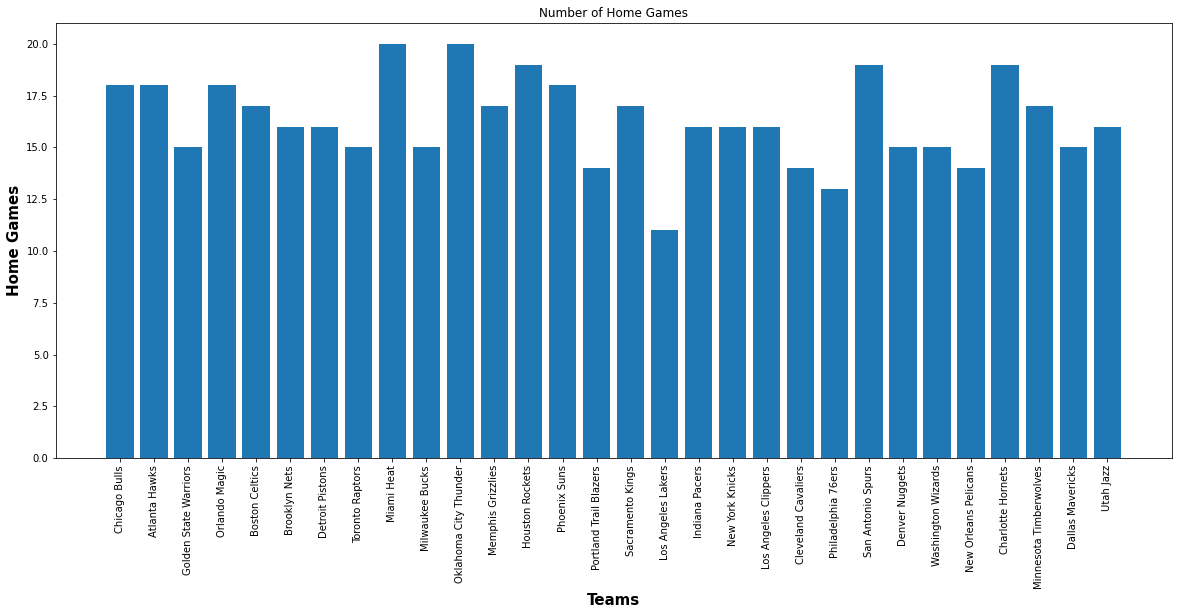

In [81]:
plt.figure(figsize=(20,8))
name_home_matches = list(home_matches.keys())
values_home_matches = list(home_matches.values())
plt.bar(range(len(home_matches)), values_home_matches, tick_label=name_home_matches)
plt.xticks(rotation=90)
plt.title('Number of Home Games')
plt.xlabel('Teams', fontweight ='bold', fontsize = 15) 
plt.ylabel('Home Games', fontweight ='bold', fontsize = 15) 
plt.show()

In [82]:
away_matches

{'Cleveland Cavaliers': 16,
 'Detroit Pistons': 17,
 'New Orleans Pelicans': 18,
 'Washington Wizards': 15,
 'Philadelphia 76ers': 21,
 'Chicago Bulls': 12,
 'Utah Jazz': 15,
 'Indiana Pacers': 16,
 'Charlotte Hornets': 12,
 'New York Knicks': 17,
 'San Antonio Spurs': 15,
 'Denver Nuggets': 18,
 'Dallas Mavericks': 17,
 'Los Angeles Clippers': 18,
 'Minnesota Timberwolves': 16,
 'Memphis Grizzlies': 17,
 'Atlanta Hawks': 16,
 'Miami Heat': 11,
 'Oklahoma City Thunder': 13,
 'Toronto Raptors': 18,
 'Brooklyn Nets': 16,
 'Golden State Warriors': 17,
 'Los Angeles Lakers': 22,
 'Portland Trail Blazers': 21,
 'Phoenix Suns': 17,
 'Sacramento Kings': 15,
 'Houston Rockets': 15,
 'Milwaukee Bucks': 19,
 'Orlando Magic': 14,
 'Boston Celtics': 15}

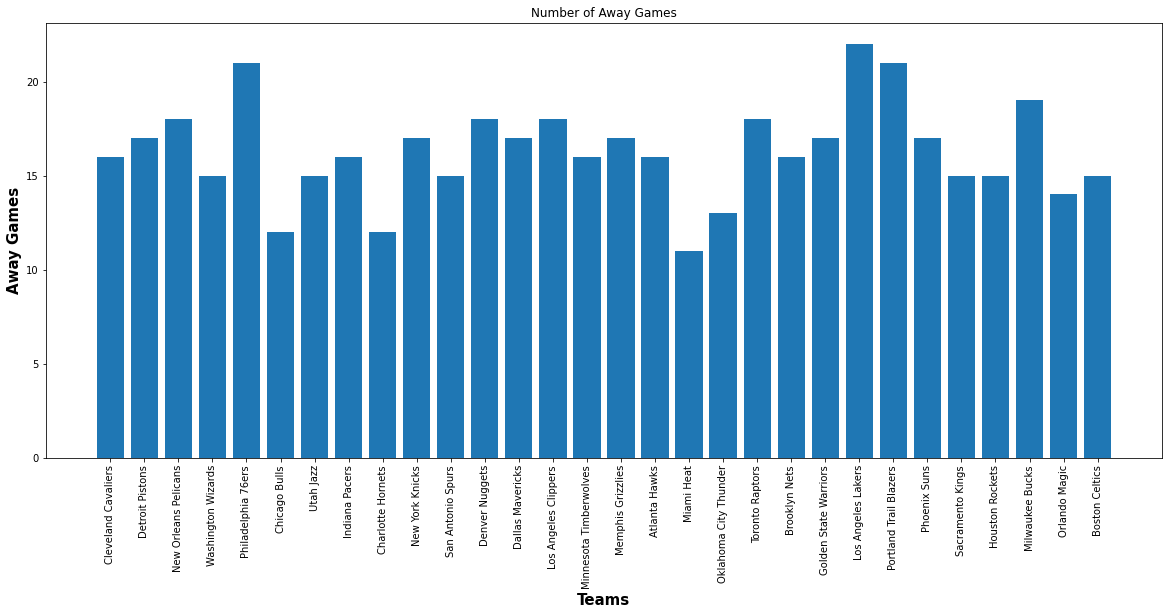

In [83]:
plt.figure(figsize=(20,8))
name_away_matches = list(away_matches.keys())
values_away_matches = list(away_matches.values())
plt.bar(range(len(away_matches)), values_away_matches, tick_label=name_away_matches)
plt.xticks(rotation=90)
plt.title('Number of Away Games')
plt.xlabel('Teams', fontweight ='bold', fontsize = 15) 
plt.ylabel('Away Games', fontweight ='bold', fontsize = 15) 
plt.show()

In [84]:
#Winrates for each team
home_win_rates = {team : home_wins[team]/home_matches[team] for team in home_wins}
away_win_rates = {team : away_wins[team]/away_matches[team] for team in away_wins}

In [85]:
home_win_rates

{'Chicago Bulls': 0.7222222222222222,
 'Atlanta Hawks': 0.6666666666666666,
 'Golden State Warriors': 1.0,
 'Orlando Magic': 0.6666666666666666,
 'Boston Celtics': 0.5294117647058824,
 'Brooklyn Nets': 0.375,
 'Detroit Pistons': 0.6875,
 'Toronto Raptors': 0.6666666666666666,
 'Miami Heat': 0.65,
 'Milwaukee Bucks': 0.6,
 'Oklahoma City Thunder': 0.8,
 'Memphis Grizzlies': 0.6470588235294118,
 'Houston Rockets': 0.5263157894736842,
 'Phoenix Suns': 0.4444444444444444,
 'Portland Trail Blazers': 0.5714285714285714,
 'Sacramento Kings': 0.47058823529411764,
 'Los Angeles Lakers': 0.18181818181818182,
 'Indiana Pacers': 0.6875,
 'New York Knicks': 0.5,
 'Los Angeles Clippers': 0.625,
 'Cleveland Cavaliers': 0.9285714285714286,
 'Philadelphia 76ers': 0.07692307692307693,
 'San Antonio Spurs': 1.0,
 'Denver Nuggets': 0.3333333333333333,
 'Washington Wizards': 0.4666666666666667,
 'New Orleans Pelicans': 0.5,
 'Charlotte Hornets': 0.6842105263157895,
 'Minnesota Timberwolves': 0.294117647058

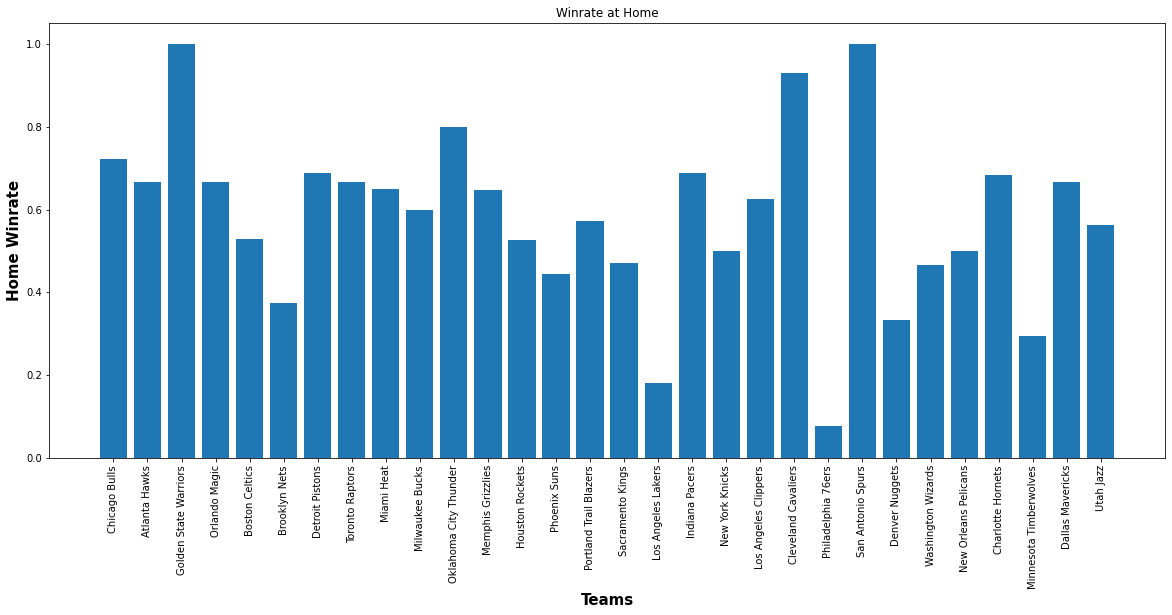

In [86]:
plt.figure(figsize=(20,8))
name_home_matches_win = list(home_win_rates.keys())
values_home_matches_win = list(home_win_rates.values())
plt.bar(range(len(away_matches)), values_home_matches_win, tick_label=name_home_matches_win)
plt.xticks(rotation=90)
plt.title('Winrate at Home')
plt.xlabel('Teams', fontweight ='bold', fontsize = 15) 
plt.ylabel('Home Winrate', fontweight ='bold', fontsize = 15) 
plt.show()

In [87]:
away_win_rates

{'Cleveland Cavaliers': 0.5,
 'Detroit Pistons': 0.4117647058823529,
 'New Orleans Pelicans': 0.16666666666666666,
 'Washington Wizards': 0.4666666666666667,
 'Philadelphia 76ers': 0.09523809523809523,
 'Chicago Bulls': 0.4166666666666667,
 'Utah Jazz': 0.3333333333333333,
 'Indiana Pacers': 0.4375,
 'Charlotte Hornets': 0.3333333333333333,
 'New York Knicks': 0.4117647058823529,
 'San Antonio Spurs': 0.6,
 'Denver Nuggets': 0.3888888888888889,
 'Dallas Mavericks': 0.5294117647058824,
 'Los Angeles Clippers': 0.6111111111111112,
 'Minnesota Timberwolves': 0.4375,
 'Memphis Grizzlies': 0.4117647058823529,
 'Atlanta Hawks': 0.5625,
 'Miami Heat': 0.45454545454545453,
 'Oklahoma City Thunder': 0.5384615384615384,
 'Toronto Raptors': 0.5555555555555556,
 'Brooklyn Nets': 0.1875,
 'Golden State Warriors': 0.8823529411764706,
 'Los Angeles Lakers': 0.18181818181818182,
 'Portland Trail Blazers': 0.2857142857142857,
 'Phoenix Suns': 0.23529411764705882,
 'Sacramento Kings': 0.2666666666666666

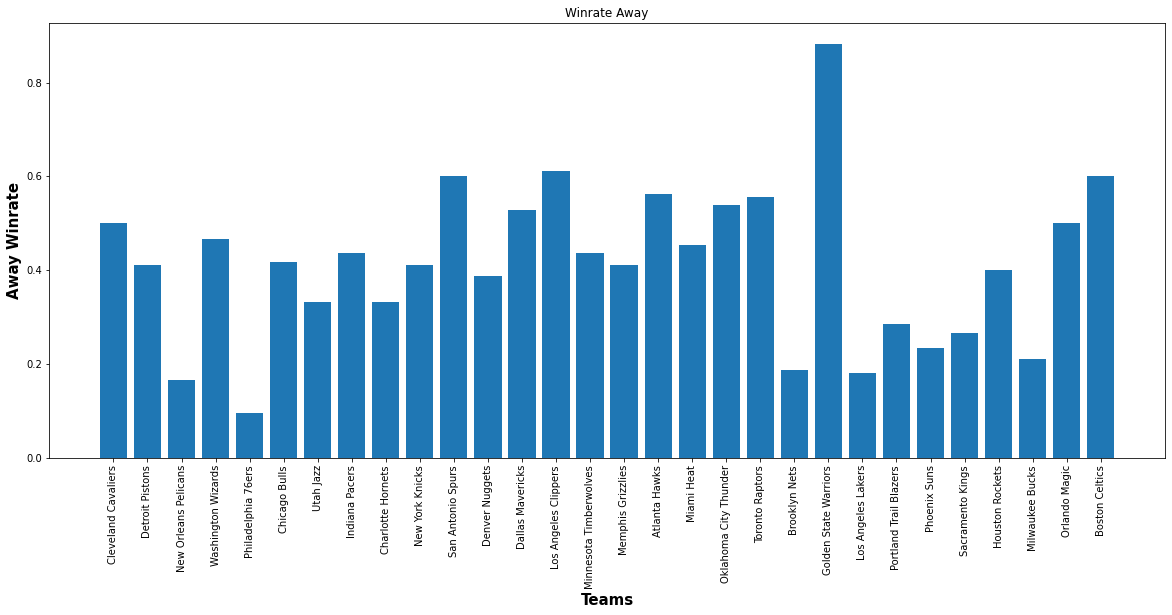

In [94]:
plt.figure(figsize=(20,8))
name_away_matches_win = list(away_win_rates.keys())
values_away_matches_win = list(away_win_rates.values())
plt.bar(range(len(away_win_rates)), values_away_matches_win, tick_label=name_away_matches_win)
plt.xticks(rotation=90)
plt.title('Winrate Away')
plt.xlabel('Teams', fontweight ='bold', fontsize = 15) 
plt.ylabel('Away Winrate', fontweight ='bold', fontsize = 15) 
plt.show()

In [89]:
np.mean(values_away_matches_win)

0.4137515233877463

In [90]:
np.mean(values_home_matches_win)

0.5843759126150767

- The Teams are more likely to win at home than they are to win at away games.